In [ ]:
# Попытаемся предсказатть зашумленную функцию sin(y)

In [2]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt

#  Тренировочная выборка

In [50]:
x_train = torch.rand(100) # равномерное распределение
x_train = x_train * 20 - 10.0

In [51]:
y_train = torch.sin(x_train)

Text(0.5, 1.0, 'y = sin(x)')

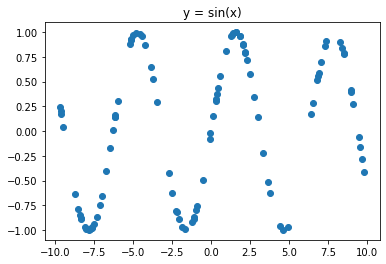

In [52]:
plt.plot(x_train, y_train, 'o')
plt.title('y = sin(x)')

Text(0.5, 1.0, 'Нормальное распределение')

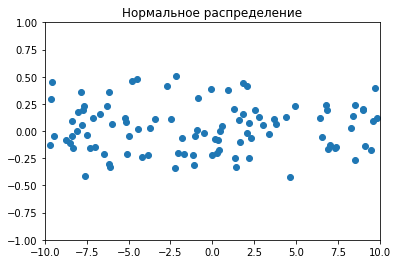

In [53]:
# добавим шум

noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train, noise, 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Нормальное распределение')


Text(0, 0.5, 'y_train')

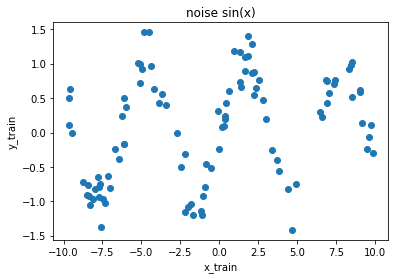

In [54]:
y_train = y_train + noise
plt.plot(x_train, y_train, 'o')
plt.title('noise sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [55]:
x_train.shape

torch.Size([100])

In [56]:
y_train.shape

torch.Size([100])

In [57]:
# трансформируем измерение с помощью unsqeeze_ , нижнее подчеркивание
# меняет изначальный объект, делает каждое число вектором!!!

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-0.2361],
        [-0.0093],
        [-0.9342],
        [ 0.2352],
        [-0.7973],
        [-0.8261],
        [ 1.1861],
        [ 0.7675],
        [ 1.0208],
        [-0.3105],
        [-0.5601],
        [ 0.6343],
        [ 0.8783],
        [ 0.7445],
        [ 0.3718],
        [ 1.1126],
        [-1.1521],
        [ 0.7158],
        [ 0.8996],
        [-0.8176],
        [-0.4532],
        [ 0.8686],
        [-1.0333],
        [ 0.4280],
        [ 0.7571],
        [-0.7913],
        [-0.8016],
        [ 0.1924],
        [ 0.4981],
        [-0.0117],
        [-0.7461],
        [ 0.5461],
        [ 0.5001],
        [-0.7598],
        [ 0.1430],
        [-1.1464],
        [ 0.5170],
        [-1.0230],
        [ 1.4556],
        [ 0.4045],
        [-1.0878],
        [-0.2452],
        [ 0.0788],
        [-0.2527],
        [ 0.7085],
        [ 1.4019],
        [-0.7180],
        [ 0.1004],
        [-0.1733],
        [ 0.9735],
        [ 0.9198],
        [ 0.5674],
        [-0.

# Валидационная выборка

Text(0.5, 1.0, 'sin(x)')

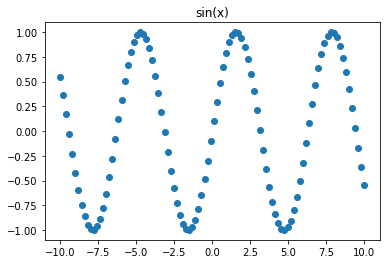

In [71]:
# Функция numpy.linspace() 
# в Python используется для генерации последовательности чисел
# в линейном пространстве с одинаковым размером шага

x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation, y_validation, 'o')
plt.title('sin(x)')

In [72]:
# модифицируем размерность

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

torch.Size([100, 1])

# Модель НС

In [75]:
class SinNet(torch.nn.Module): #наследуем от класса nn.Module
    def __init__(self, n_hidden_neurons):
        super(SinNet, self).__init__() # инициализируем родительский объект
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # 1 вход и n нейронов в слое
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x): # последовательность применения слоев
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
        
sin_net = SinNet(50) # 50 нейронов дали сети

# Необученная модель

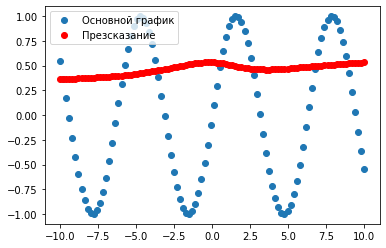

In [79]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x, y, 'o', label='Основной график')
    plt.plot(x, y_pred.data, 'o', c='r', label='Презсказание')
    plt.legend(loc='upper left')
    
predict(sin_net, x_validation, y_validation)

# Обучаем модель

In [80]:
# для начала нам нужен оптимизатор

# используем .parameters() чтобы получить параметры сети, которые собираемся обучать, то есть веса
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01) 


In [82]:
list(sin_net.parameters())

[Parameter containing:
 tensor([[ 0.2612],
         [ 0.9747],
         [-0.6898],
         [-0.6080],
         [-0.5806],
         [-0.2141],
         [ 0.6680],
         [-0.0141],
         [ 0.7011],
         [-0.4239],
         [ 0.9565],
         [-0.6402],
         [-0.4197],
         [-0.6155],
         [ 0.7042],
         [-0.8654],
         [ 0.1171],
         [ 0.7001],
         [-0.7514],
         [-0.1627],
         [ 0.3030],
         [-0.6722],
         [-0.5470],
         [ 0.6640],
         [ 0.3517],
         [-0.7799],
         [ 0.8893],
         [ 0.7893],
         [-0.2922],
         [ 0.3573],
         [ 0.1074],
         [ 0.7743],
         [ 0.0396],
         [-0.8831],
         [-0.8973],
         [-0.7705],
         [-0.1054],
         [ 0.1575],
         [-0.4002],
         [-0.8913],
         [ 0.3549],
         [-0.9406],
         [ 0.0888],
         [ 0.0182],
         [ 0.3993],
         [-0.9792],
         [ 0.4683],
         [-0.6565],
         [-0.4803

In [83]:
# функция потерь

def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

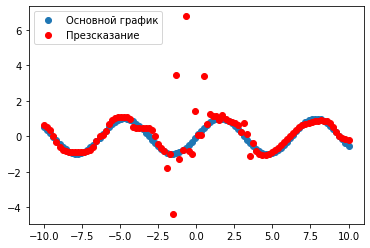

In [92]:
# тренировка

for epoch_index in range(25000):
    optimizer.zero_grad() # зануляем градиент, чтобы не было накопления
    
    y_pred = sin_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    
    optimizer.step()
    
predict(sin_net, x_validation, y_validation)